## Test findEssentialMat
1. Tea tin images with 9 hand-picked coordinates
2. 9 synthetic points (taken from ParticleFilter_TR)

## 1. Tea tin images

In [2]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('teatin1.png') # third dimension: colour (BGR)
img2 = cv2.imread('teatin2.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [3]:
img2.shape

(480, 640, 3)

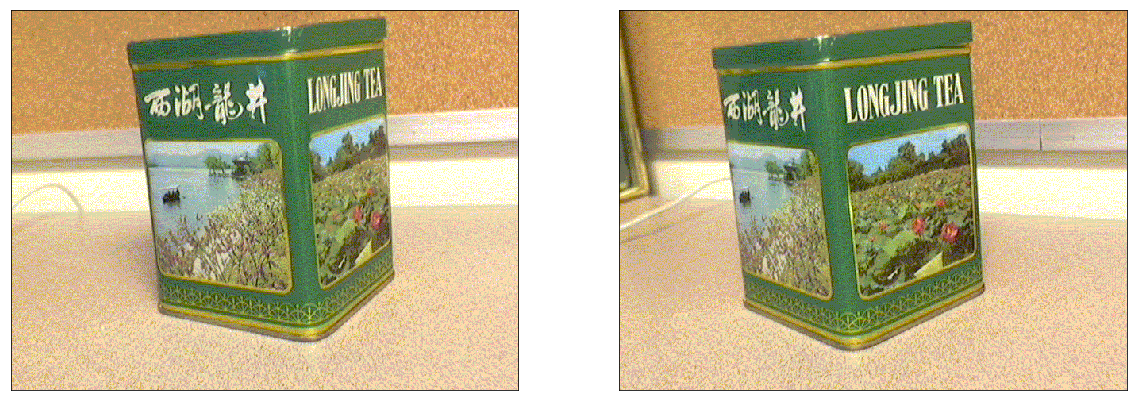

In [4]:
plt.figure(1, figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap = None, interpolation = None) 
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap = None, interpolation = None)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.show()

In [5]:
# Hand-pick correspondences for ground truth
c1 = np.array([[375., 188.],
               [118., 173.],
               [330., 482.],
               [188., 402.],
               [246., 193.],
               [144., 320.],
               [131., 376.],
               [30. , 351.],
               [109., 465.]
              ])

c2 = np.array([[367., 159.],
               [122., 135.],
               [347., 459.],
               [200., 328.],
               [244., 153.],
               [154., 234.],
               [143., 288.],
               [43. , 253.],
               [118., 430.]
              ])

c1 = c1[:,[1,0]]
c2 = c2[:,[1,0]]

c1_norm = c1 - np.array([640, 480])/2
c2_norm = c2 - np.array([640, 480])/2

F, inliers = cv2.findEssentialMat(c2_norm,c1_norm)
print("Inliers:" + str(sum(inliers)[0]) + '/' + str(inliers.shape[0]))
print("F shape: " + str(F.shape))

Inliers:9/9
F shape: (3, 3)


In [6]:
F

array([[-2.09700313e-05, -2.24358897e-04, -1.12463587e-01],
       [ 1.38269339e-05, -4.66233165e-05, -6.98105962e-01],
       [ 7.52142962e-02,  7.03095126e-01, -8.01527215e-05]])

In [19]:
def drawlines(img1,img2,lines,pts1,pts2,pp=(0,0)):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    rw,c,ch = img1.shape
    
    img1 = img1.copy()
    img2 = img2.copy()
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
#         x0,y0 = map(int, [0, -r[2]/r[1] ])
#         x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        x0,y0 = map(int, [0, -(r[2]+r[0]*-pp[0])/r[1] + pp[1]])
        x1,y1 = map(int, [c, -(r[2]+r[0]*(c-pp[0]))/r[1] + pp[1]])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple([pt1[0],pt1[1]]),4,color,-1)
        img2 = cv2.circle(img2,tuple([pt2[0],pt2[1]]),4,color,-1)
    return img1,img2

In [20]:
lines1 = cv2.computeCorrespondEpilines(c2_norm.reshape(-1,1,2), 1, F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,c1.astype(int),c2.astype(int), (320, 240))

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image

lines2 = cv2.computeCorrespondEpilines(c2_norm.reshape(-1,1,2), 2, F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,c2.astype(int),c1.astype(int), (320, 240))


Estimated ground truth from hand-picked coordinates


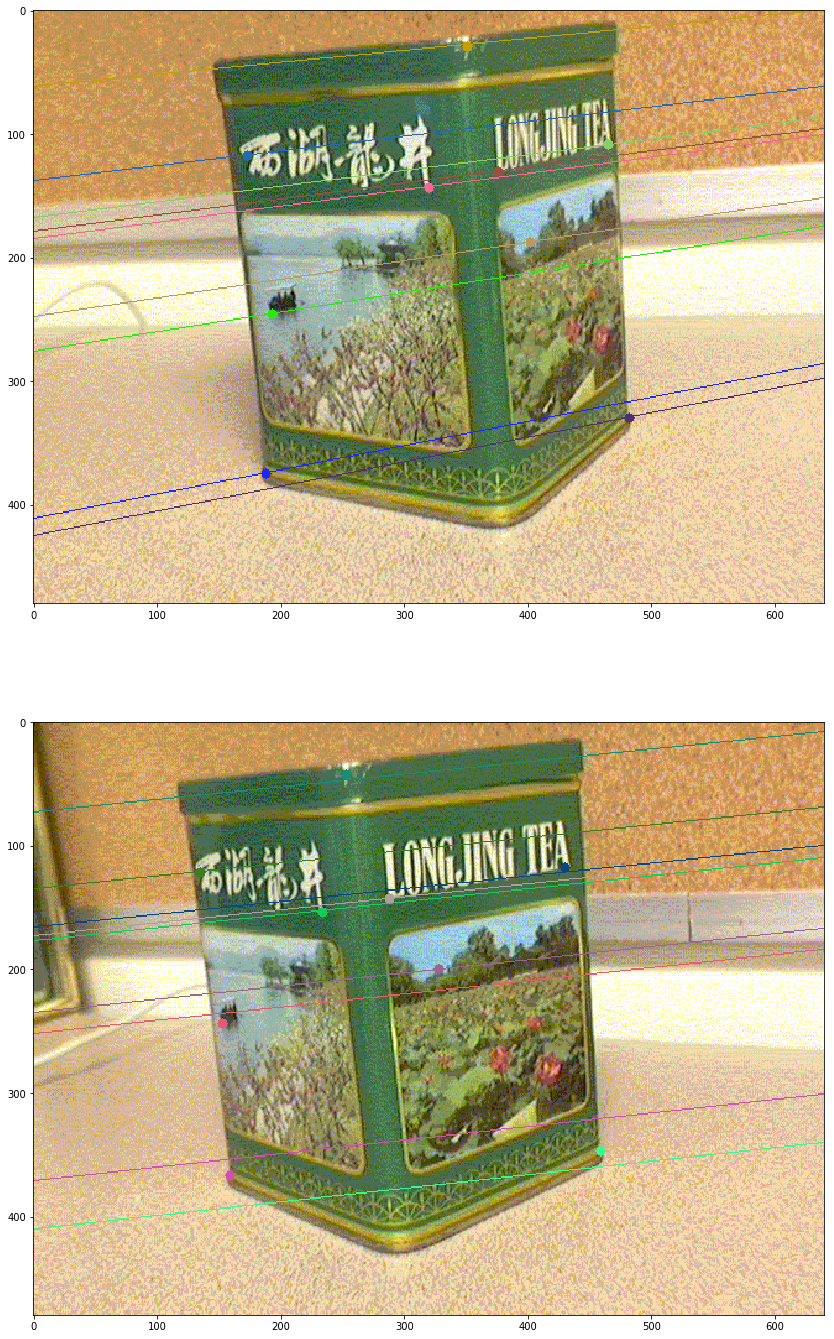

In [21]:
print("Estimated ground truth from hand-picked coordinates")
plt.figure(2, figsize=(16,24))
plt.subplot(211),plt.imshow(img5)
plt.subplot(212),plt.imshow(img3)
plt.show()

In [22]:
print(F)

[[-2.09700313e-05 -2.24358897e-04 -1.12463587e-01]
 [ 1.38269339e-05 -4.66233165e-05 -6.98105962e-01]
 [ 7.52142962e-02  7.03095126e-01 -8.01527215e-05]]


In [23]:
from scipy.linalg import null_space
np.set_printoptions(suppress=True,precision=8)
e1 = null_space(F.T)
e2 = null_space(F)

print(e1)
print(e2)
if (e1):
    print("Epipole in image 1: " + str((e1 / e1[2])[:2,0]))
if (e2):
    print("Epipole in image 2: " + str((e2 / e2[2])[:2,0]))
print()
# Epipoles are normalised to (u, v, 1)

print("Check that epipoles are correct nullspaces (multiply by F)")
print(e1.T @ F)
print(F @ e2)
print()

[]
[]

Check that epipoles are correct nullspaces (multiply by F)
[]
[]



C:\Users\arborea\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
C:\Users\arborea\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


## 2. Synthetic points

In [24]:
p1 = np.array([[ 0.189, 0.185], 
              [ 0.4 , -0.232], 
              [-0.006, 0.211], 
              [ 0.102, -0.31 ], 
              [ 0.332, 0.618], 
              [ 0.15 , -0.321], 
              [-0.002, -0.443], 
              [ 0.71 , -0.337], 
              [-0.171, -0.167]])

p2 = np.array([[ 0.423, 0.509], 
               [-0.421, 0.485], 
               [ 0.17 , 0.507], 
               [ 0.075, 0.022], 
               [ 0.162, 1.138], 
               [-0.067, 0.119], 
               [-0.069, -0.037], 
               [-0.134, 0.306], 
               [ 0.083, 0.106]])

Fp, inliers_p = cv2.findEssentialMat(p2,p1, threshold = 0.002) # threshold is 1 by default

print("Inliers:" + str(sum(inliers_p)[0]) + '/' + str(inliers_p.shape[0]))
print("F shape: " + str(Fp.shape))

Inliers:9/9
F shape: (3, 3)


In [25]:
print(Fp)
print(np.sum(Fp ** 2))

[[-0.26177988 -0.252678   -0.09380117]
 [-0.36697464  0.08624917 -0.55956273]
 [ 0.25494979  0.54629919 -0.20041086]]
0.9999999999999997


In [26]:
p1_uvf = np.concatenate((p1, np.ones((p1.shape[0], 1))), axis = 1)
p2_uvf = np.concatenate((p2, np.ones((p2.shape[0], 1))), axis = 1)

for i in range(p1_uvf.shape[0]):
    print(p1_uvf[i] @ Fp @ p2_uvf[i].T)

-0.0015806760180416268
-0.0009752302321905659
-0.0005016740672589837
-1.1796119636642288e-16
2.220446049250313e-16
-2.0816681711721685e-17
-1.1102230246251565e-16
-0.0008898813243174986
-8.326672684688674e-17


In [27]:
# Check ground truth
from math import sqrt
Fp_gt = np.array([[-0.8480644, -0.8181247, -0.31852582],
                 [-1.20878209, 0.26679706,-1.8621668 ],
                 [ 0.84998137, 1.82300738,-0.66646513]])

print("Normalised ground truth:")
Fp_gt_norm = Fp_gt / sqrt(np.sum(Fp_gt ** 2))
print(Fp_gt_norm)
print(np.sum(Fp_gt_norm ** 2))

Normalised ground truth:
[[-0.25593381 -0.24689843 -0.09612658]
 [-0.3647933   0.08051557 -0.56197554]
 [ 0.25651233  0.55015778 -0.20112973]]
1.0


In [28]:
for i in range(p1_uvf.shape[0]):
    print(p1_uvf[i, :] @ Fp_gt_norm @ p2_uvf[i, :].T)

9.373220140285188e-05
0.00014405619531659974
-5.2419827453242807e-05
4.0068896055428516e-05
0.0003462612699740575
0.0003716583673485374
7.800584049416637e-05
-8.608417827422887e-05
0.0005039431321094967
